# 1. Import Libraries

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # holistic models
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSTION
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make predictions
    image.flags.writeable = True                   # Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSTION
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)     # DRAW FACE CONNECTIONS
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)      # DRAW POSE CONNECTIONS
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # DRAW LEFT HAND CONNECTIONS
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)# DRAW RIGHT HAND CONNECTIONS

In [18]:
def draw_styled_landmarks(image, results):
    # DRAW FACE CONNECTIONS
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # DRAW POSE CONNECTIONS
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )      
    # DRAW LEFT HAND CONNECTIONS
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,121), thickness=2, circle_radius=2)
                             ) 
    # DRAW RIGHT HAND CONNECTIONS
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,121), thickness=2, circle_radius=2)
                             )

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read() # Read frame
        image, results = mediapipe_detection(frame, holistic) # Make decisions
        print(results)
        draw_styled_landmarks(image, results) #draw landmarks
        cv2.imshow('OpenCV Feed', image) #show to screen
        if cv2.waitKey (10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [25]:
#results.left_hand_landmarks.landmark

In [23]:
draw_styled_landmarks(frame, results)

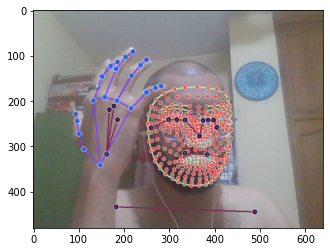

In [24]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [27]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [52]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [49]:
len(results.face_landmarks.landmark)*3

1404

In [56]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [57]:
extract_keypoints(results).shape

(1662,)

In [61]:
result_test = extract_keypoints(results)

In [62]:
result_test

array([ 0.46022868,  0.60880578, -1.29165816, ...,  0.        ,
        0.        ,  0.        ])

In [63]:
np.save('0', result_test)

# 4. Setup Folders for Collection

In [58]:
# Path for exported data
DATA_PATH = os.path.join('MP_Data')
# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
# Number of videos
no_sequences = 30
# Frames per video
sequence_length = 30

In [60]:
# Create MP_Data Folder > 3 class folders > Each class folder has 30 folders
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [64]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # lopp through actions
    for action in actions:
        # lopp through sequences aka videos
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Read frame
                ret, frame = cap.read() 
                
                # Make decisions
                image, results = mediapipe_detection(frame, holistic)   
                print(results)
                
                #draw landmarks
                draw_styled_landmarks(image, results) 
                
                # Apply collection wait logic
                if frame_num == 0: # Checking if first frame
                    # Out putting this waiting message on the screen
                    cv2.putText(image, 'STARTING COLLECTION', (120,120),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000) # Waiting 
                else:
                    
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
                # Export key point
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                #show to screen
                cv2.imshow('OpenCV Feed', image) 
        
                if cv2.waitKey (10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 6. Preprocess Data and Create Labels and Features

In [65]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [69]:
label_map = {label:num for num, label in enumerate(actions)}

In [70]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [73]:
sequences, labels = [], [] # Videos and their labels
for action in actions: # Going through each action category folder wise
    for sequence in range(no_sequences): # Going through each video 
        window = [] # Blank list to get all the frames
        for frame_num in range(sequence_length): # Going through 30 frames
            # Locating each frame
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Attaching to create 1 video
            window.append(res)
        # attaching all the videos for each class or category or action    
        sequences.append(window)
        # Labeling that action class or category
        labels.append(label_map[action])
            

In [74]:
np.array(sequences).shape

(90, 30, 1662)

In [75]:
# 90 videos, 30 frame each, 1662 keypoints

In [76]:
np.array(labels).shape

(90,)

In [77]:
X = np.array(sequences)

In [78]:
X.shape

(90, 30, 1662)

In [79]:
y = to_categorical(labels).astype(int)

In [80]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [86]:
X_train.shape

(85, 30, 1662)

In [87]:
X_test.shape

(5, 30, 1662)

In [88]:
y_train.shape

(85, 3)

# 7. Build and Train LSTM Neural Network

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [90]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [92]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [101]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 2s 884ms/step - loss: 2.5580e-05 - accuracy: 1.0000
Epoch 2/1000
3/3 [==============================] - 0s 88ms/step - loss: 2.5500e-05 - accuracy: 1.0000
Epoch 3/1000
3/3 [==============================] - 0s 77ms/step - loss: 2.5400e-05 - accuracy: 1.0000
Epoch 4/1000
3/3 [==============================] - 0s 69ms/step - loss: 2.5313e-05 - accuracy: 1.0000
Epoch 5/1000
3/3 [==============================] - 0s 84ms/step - loss: 2.5200e-05 - accuracy: 1.0000
Epoch 6/1000
3/3 [==============================] - 0s 78ms/step - loss: 2.5134e-05 - accuracy: 1.0000
Epoch 7/1000
3/3 [==============================] - 0s 73ms/step - loss: 2.5044e-05 - accuracy: 1.0000
Epoch 8/1000
3/3 [==============================] - 0s 81ms/step - loss: 2.4967e-05 - accuracy: 1.0000
Epoch 9/1000
3/3 [==============================] - 0s 85ms/step - loss: 2.4884e-05 - accuracy: 1.0000
Epoch 10/1000
3/3 [==============================] - 0s 82ms/step - loss

3/3 [==============================] - 0s 84ms/step - loss: 1.9534e-05 - accuracy: 1.0000
Epoch 80/1000
3/3 [==============================] - 0s 77ms/step - loss: 1.9469e-05 - accuracy: 1.0000
Epoch 81/1000
3/3 [==============================] - 0s 83ms/step - loss: 1.9383e-05 - accuracy: 1.0000
Epoch 82/1000
3/3 [==============================] - 0s 79ms/step - loss: 1.9321e-05 - accuracy: 1.0000
Epoch 83/1000
3/3 [==============================] - 0s 79ms/step - loss: 1.9263e-05 - accuracy: 1.0000
Epoch 84/1000
3/3 [==============================] - 0s 76ms/step - loss: 1.9181e-05 - accuracy: 1.0000
Epoch 85/1000
3/3 [==============================] - 0s 75ms/step - loss: 1.9125e-05 - accuracy: 1.0000
Epoch 86/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.9061e-05 - accuracy: 1.0000
Epoch 87/1000
3/3 [==============================] - 0s 70ms/step - loss: 1.9005e-05 - accuracy: 1.0000
Epoch 88/1000
3/3 [==============================] - 0s 71ms/step - loss: 1.89

3/3 [==============================] - 0s 82ms/step - loss: 1.5249e-05 - accuracy: 1.0000
Epoch 158/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.5214e-05 - accuracy: 1.0000
Epoch 159/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.5155e-05 - accuracy: 1.0000
Epoch 160/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.5103e-05 - accuracy: 1.0000
Epoch 161/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.5060e-05 - accuracy: 1.0000
Epoch 162/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.5016e-05 - accuracy: 1.0000
Epoch 163/1000
3/3 [==============================] - 0s 72ms/step - loss: 1.4957e-05 - accuracy: 1.0000
Epoch 164/1000
3/3 [==============================] - 0s 80ms/step - loss: 1.4907e-05 - accuracy: 1.0000
Epoch 165/1000
3/3 [==============================] - 0s 87ms/step - loss: 1.4877e-05 - accuracy: 1.0000
Epoch 166/1000
3/3 [==============================] - 0s 79ms/step - l

3/3 [==============================] - 0s 73ms/step - loss: 1.2015e-05 - accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 75ms/step - loss: 1.1979e-05 - accuracy: 1.0000
Epoch 237/1000
3/3 [==============================] - 0s 70ms/step - loss: 1.1943e-05 - accuracy: 1.0000
Epoch 238/1000
3/3 [==============================] - 0s 75ms/step - loss: 1.1909e-05 - accuracy: 1.0000
Epoch 239/1000
3/3 [==============================] - 0s 69ms/step - loss: 1.1861e-05 - accuracy: 1.0000
Epoch 240/1000
3/3 [==============================] - 0s 71ms/step - loss: 1.1833e-05 - accuracy: 1.0000
Epoch 241/1000
3/3 [==============================] - 0s 70ms/step - loss: 1.1805e-05 - accuracy: 1.0000
Epoch 242/1000
3/3 [==============================] - 0s 69ms/step - loss: 1.1763e-05 - accuracy: 1.0000
Epoch 243/1000
3/3 [==============================] - 0s 75ms/step - loss: 1.1738e-05 - accuracy: 1.0000
Epoch 244/1000
3/3 [==============================] - 0s 70ms/step - l

3/3 [==============================] - 0s 75ms/step - loss: 9.5194e-06 - accuracy: 1.0000
Epoch 313/1000
3/3 [==============================] - 0s 73ms/step - loss: 9.4970e-06 - accuracy: 1.0000
Epoch 314/1000
3/3 [==============================] - 0s 69ms/step - loss: 9.4647e-06 - accuracy: 1.0000
Epoch 315/1000
3/3 [==============================] - 0s 68ms/step - loss: 9.4352e-06 - accuracy: 1.0000
Epoch 316/1000
3/3 [==============================] - 0s 70ms/step - loss: 9.4044e-06 - accuracy: 1.0000
Epoch 317/1000
3/3 [==============================] - 0s 77ms/step - loss: 9.3834e-06 - accuracy: 1.0000
Epoch 318/1000
3/3 [==============================] - 0s 71ms/step - loss: 9.3469e-06 - accuracy: 1.0000
Epoch 319/1000
3/3 [==============================] - 0s 69ms/step - loss: 9.3160e-06 - accuracy: 1.0000
Epoch 320/1000
3/3 [==============================] - 0s 71ms/step - loss: 9.2852e-06 - accuracy: 1.0000
Epoch 321/1000
3/3 [==============================] - 0s 70ms/step - l

3/3 [==============================] - 0s 78ms/step - loss: 7.5702e-06 - accuracy: 1.0000
Epoch 391/1000
3/3 [==============================] - 0s 72ms/step - loss: 7.5561e-06 - accuracy: 1.0000
Epoch 392/1000
3/3 [==============================] - 0s 76ms/step - loss: 7.5253e-06 - accuracy: 1.0000
Epoch 393/1000
3/3 [==============================] - 0s 76ms/step - loss: 7.5169e-06 - accuracy: 1.0000
Epoch 394/1000
3/3 [==============================] - 0s 69ms/step - loss: 7.4958e-06 - accuracy: 1.0000
Epoch 395/1000
3/3 [==============================] - 0s 70ms/step - loss: 7.4692e-06 - accuracy: 1.0000
Epoch 396/1000
3/3 [==============================] - 0s 70ms/step - loss: 7.4453e-06 - accuracy: 1.0000
Epoch 397/1000
3/3 [==============================] - 0s 77ms/step - loss: 7.4313e-06 - accuracy: 1.0000
Epoch 398/1000
3/3 [==============================] - 0s 68ms/step - loss: 7.3991e-06 - accuracy: 1.0000
Epoch 399/1000
3/3 [==============================] - 0s 70ms/step - l

3/3 [==============================] - 0s 71ms/step - loss: 6.1398e-06 - accuracy: 1.0000
Epoch 469/1000
3/3 [==============================] - 0s 71ms/step - loss: 6.1271e-06 - accuracy: 1.0000
Epoch 470/1000
3/3 [==============================] - 0s 74ms/step - loss: 6.1061e-06 - accuracy: 1.0000
Epoch 471/1000
3/3 [==============================] - 0s 71ms/step - loss: 6.0907e-06 - accuracy: 1.0000
Epoch 472/1000
3/3 [==============================] - 0s 70ms/step - loss: 6.0766e-06 - accuracy: 1.0000
Epoch 473/1000
3/3 [==============================] - 0s 70ms/step - loss: 6.0626e-06 - accuracy: 1.0000
Epoch 474/1000
3/3 [==============================] - 0s 71ms/step - loss: 6.0444e-06 - accuracy: 1.0000
Epoch 475/1000
3/3 [==============================] - 0s 70ms/step - loss: 6.0276e-06 - accuracy: 1.0000
Epoch 476/1000
3/3 [==============================] - 0s 70ms/step - loss: 6.0177e-06 - accuracy: 1.0000
Epoch 477/1000
3/3 [==============================] - 0s 74ms/step - l

3/3 [==============================] - 0s 71ms/step - loss: 5.0094e-06 - accuracy: 1.0000
Epoch 547/1000
3/3 [==============================] - 0s 69ms/step - loss: 4.9968e-06 - accuracy: 1.0000
Epoch 548/1000
3/3 [==============================] - 0s 78ms/step - loss: 4.9870e-06 - accuracy: 1.0000
Epoch 549/1000
3/3 [==============================] - 0s 74ms/step - loss: 4.9702e-06 - accuracy: 1.0000
Epoch 550/1000
3/3 [==============================] - 0s 73ms/step - loss: 4.9590e-06 - accuracy: 1.0000
Epoch 551/1000
3/3 [==============================] - 0s 72ms/step - loss: 4.9477e-06 - accuracy: 1.0000
Epoch 552/1000
3/3 [==============================] - 0s 74ms/step - loss: 4.9365e-06 - accuracy: 1.0000
Epoch 553/1000
3/3 [==============================] - 0s 71ms/step - loss: 4.9197e-06 - accuracy: 1.0000
Epoch 554/1000
3/3 [==============================] - 0s 70ms/step - loss: 4.9113e-06 - accuracy: 1.0000
Epoch 555/1000
3/3 [==============================] - 0s 76ms/step - l

3/3 [==============================] - 0s 81ms/step - loss: 4.1610e-06 - accuracy: 1.0000
Epoch 624/1000
3/3 [==============================] - 0s 70ms/step - loss: 4.1540e-06 - accuracy: 1.0000
Epoch 625/1000
3/3 [==============================] - 0s 70ms/step - loss: 4.1400e-06 - accuracy: 1.0000
Epoch 626/1000
3/3 [==============================] - 0s 71ms/step - loss: 4.1301e-06 - accuracy: 1.0000
Epoch 627/1000
3/3 [==============================] - 0s 70ms/step - loss: 4.1217e-06 - accuracy: 1.0000
Epoch 628/1000
3/3 [==============================] - 0s 82ms/step - loss: 4.1119e-06 - accuracy: 1.0000
Epoch 629/1000
3/3 [==============================] - 0s 81ms/step - loss: 4.1007e-06 - accuracy: 1.0000
Epoch 630/1000
3/3 [==============================] - 0s 75ms/step - loss: 4.0923e-06 - accuracy: 1.0000
Epoch 631/1000
3/3 [==============================] - 0s 68ms/step - loss: 4.0825e-06 - accuracy: 1.0000
Epoch 632/1000
3/3 [==============================] - 0s 70ms/step - l

3/3 [==============================] - 0s 85ms/step - loss: 3.4472e-06 - accuracy: 1.0000
Epoch 702/1000
3/3 [==============================] - 0s 86ms/step - loss: 3.4360e-06 - accuracy: 1.0000
Epoch 703/1000
3/3 [==============================] - 0s 72ms/step - loss: 3.4304e-06 - accuracy: 1.0000
Epoch 704/1000
3/3 [==============================] - 0s 71ms/step - loss: 3.4205e-06 - accuracy: 1.0000
Epoch 705/1000
3/3 [==============================] - 0s 70ms/step - loss: 3.4135e-06 - accuracy: 1.0000
Epoch 706/1000
3/3 [==============================] - 0s 72ms/step - loss: 3.4037e-06 - accuracy: 1.0000
Epoch 707/1000
3/3 [==============================] - 0s 72ms/step - loss: 3.3981e-06 - accuracy: 1.0000
Epoch 708/1000
3/3 [==============================] - 0s 72ms/step - loss: 3.3869e-06 - accuracy: 1.0000
Epoch 709/1000
3/3 [==============================] - 0s 71ms/step - loss: 3.3813e-06 - accuracy: 1.0000
Epoch 710/1000
3/3 [==============================] - 0s 69ms/step - l

3/3 [==============================] - 0s 76ms/step - loss: 2.8792e-06 - accuracy: 1.0000
Epoch 779/1000
3/3 [==============================] - 0s 93ms/step - loss: 2.8736e-06 - accuracy: 1.0000
Epoch 780/1000
3/3 [==============================] - 0s 92ms/step - loss: 2.8652e-06 - accuracy: 1.0000
Epoch 781/1000
3/3 [==============================] - 0s 70ms/step - loss: 2.8596e-06 - accuracy: 1.0000
Epoch 782/1000
3/3 [==============================] - 0s 66ms/step - loss: 2.8512e-06 - accuracy: 1.0000
Epoch 783/1000
3/3 [==============================] - 0s 71ms/step - loss: 2.8441e-06 - accuracy: 1.0000
Epoch 784/1000
3/3 [==============================] - 0s 80ms/step - loss: 2.8371e-06 - accuracy: 1.0000
Epoch 785/1000
3/3 [==============================] - 0s 72ms/step - loss: 2.8315e-06 - accuracy: 1.0000 0s - loss: 3.3099e-06 - accuracy: 1.
Epoch 786/1000
3/3 [==============================] - 0s 83ms/step - loss: 2.8287e-06 - accuracy: 1.0000
Epoch 787/1000
3/3 [=============

3/3 [==============================] - 0s 70ms/step - loss: 2.4374e-06 - accuracy: 1.0000
Epoch 856/1000
3/3 [==============================] - 0s 66ms/step - loss: 2.4262e-06 - accuracy: 1.0000
Epoch 857/1000
3/3 [==============================] - 0s 67ms/step - loss: 2.4220e-06 - accuracy: 1.0000
Epoch 858/1000
3/3 [==============================] - 0s 65ms/step - loss: 2.4178e-06 - accuracy: 1.0000
Epoch 859/1000
3/3 [==============================] - 0s 66ms/step - loss: 2.4136e-06 - accuracy: 1.0000
Epoch 860/1000
3/3 [==============================] - 0s 70ms/step - loss: 2.4136e-06 - accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 0s 64ms/step - loss: 2.4080e-06 - accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 0s 65ms/step - loss: 2.4052e-06 - accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 0s 65ms/step - loss: 2.3996e-06 - accuracy: 1.0000
Epoch 864/1000
3/3 [==============================] - 0s 67ms/step - l

3/3 [==============================] - 0s 71ms/step - loss: 2.0826e-06 - accuracy: 1.0000
Epoch 934/1000
3/3 [==============================] - 0s 75ms/step - loss: 2.0798e-06 - accuracy: 1.0000
Epoch 935/1000
3/3 [==============================] - 0s 71ms/step - loss: 2.0742e-06 - accuracy: 1.0000
Epoch 936/1000
3/3 [==============================] - 0s 71ms/step - loss: 2.0700e-06 - accuracy: 1.0000
Epoch 937/1000
3/3 [==============================] - 0s 70ms/step - loss: 2.0672e-06 - accuracy: 1.0000
Epoch 938/1000
3/3 [==============================] - 0s 71ms/step - loss: 2.0616e-06 - accuracy: 1.0000
Epoch 939/1000
3/3 [==============================] - 0s 70ms/step - loss: 2.0616e-06 - accuracy: 1.0000
Epoch 940/1000
3/3 [==============================] - 0s 73ms/step - loss: 2.0588e-06 - accuracy: 1.0000
Epoch 941/1000
3/3 [==============================] - 0s 74ms/step - loss: 2.0532e-06 - accuracy: 1.0000
Epoch 942/1000
3/3 [==============================] - 0s 70ms/step - l

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions